In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###패키지 import

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

###데이터셋 로드

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/dataset/데이콘_신용카드 사기 거래 탐지 AI 경진대회/train.csv') # Train
train_df

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/dataset/데이콘_신용카드 사기 거래 탐지 AI 경진대회/val.csv') # Validation
val_df

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,284769,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,...,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,284779,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,...,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,284790,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,284801,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0


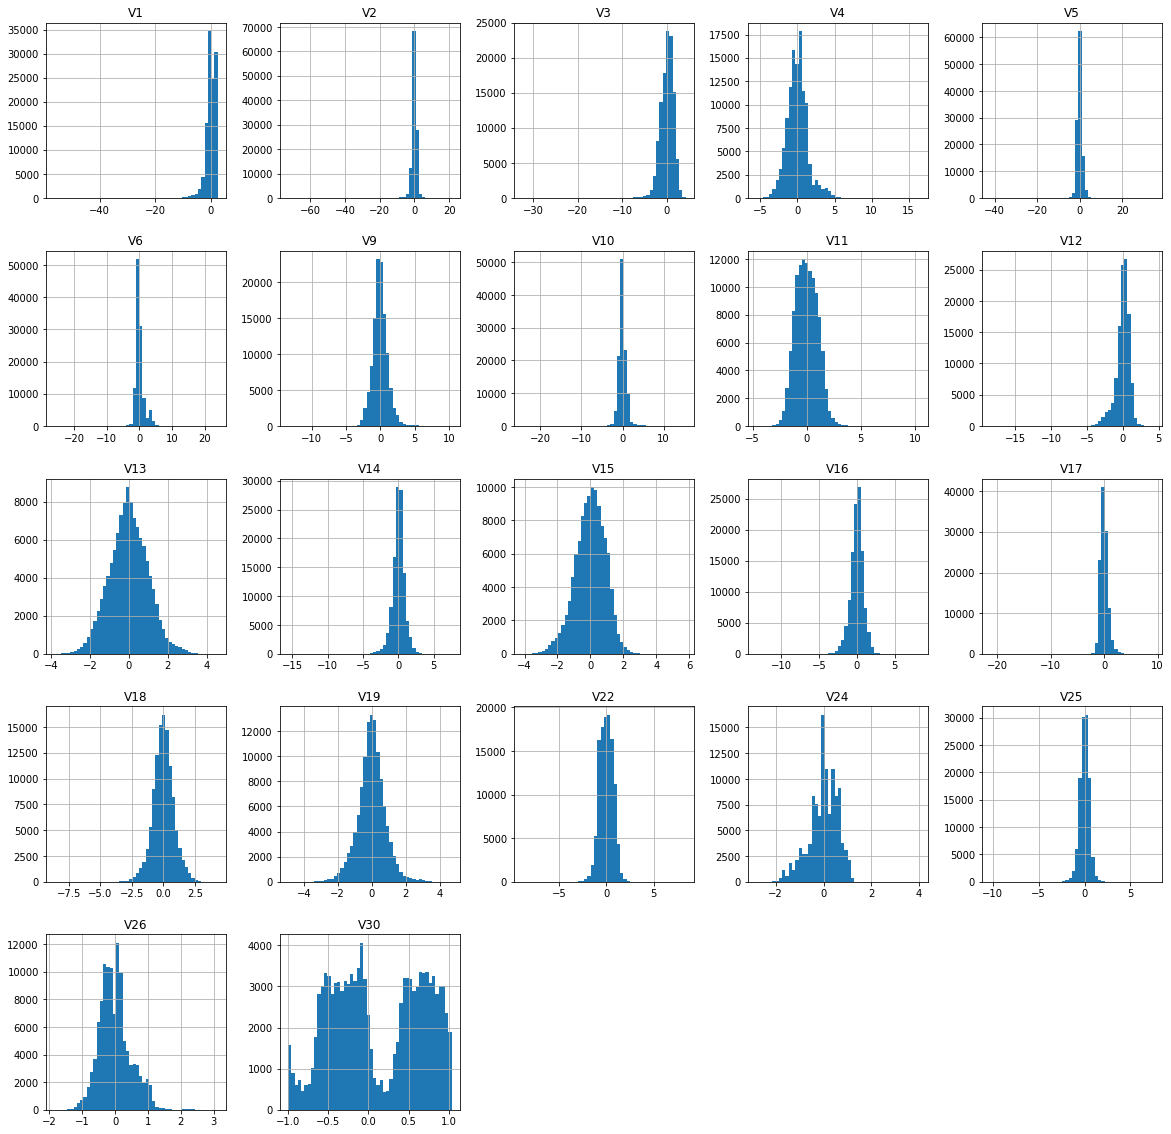

In [ ]:
train_df.drop(columns=['ID', 'V7', 'V8', 'V20', 'V21', 'V23', 'V27', 'V28', 'V29']).hist(bins = 50, figsize = (20,20))
plt.show()

In [ ]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


In [ ]:
# Train dataset은 Label이 존재하지 않음
train_x = train_df.drop(columns=['ID', 'V7', 'V8', 'V20', 'V21', 'V23', 'V27', 'V28', 'V29']) # Input Data

In [ ]:
val_df.describe()

,V1,V2,V3,V4,V5,V6,V9,V10,V11,V12,...,V16,V17,V18,V19,V22,V24,V25,V26,V30,Class
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,...,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,0.004967,0.002014,0.001414,0.001893,-0.003969,-0.017730,-0.004905,-0.002299,0.004007,0.002480,...,0.004913,0.007552,0.005733,0.000146,0.001224,0.001355,0.002284,0.000520,0.119916,0.001054
std,1.930640,1.605198,1.499749,1.405139,1.335147,1.292214,1.090843,1.084560,1.016507,0.990731,...,0.864289,0.821528,0.833280,0.808897,0.721350,0.603181,0.526864,0.484804,0.558246,0.032449
min,-29.516123,-38.305310,-30.177317,-5.071241,-21.577019,-16.172614,-9.462573,-22.187089,-4.453853,-16.060306,...,-12.675269,-20.740664,-8.153668,-4.197145,-8.555808,-2.807897,-6.035054,-1.596493,-0.994878,0.000000
25%,-0.915525,-0.598053,-0.873022,-0.852444,-0.698010,-0.774920,-0.642760,-0.540463,-0.755867,-0.408285,...,-0.461673,-0.474047,-0.491693,-0.463059,-0.542624,-0.352310,-0.322098,-0.328638,-0.357884,0.000000
50%,0.023586,0.075470,0.175784,-0.021619,-0.052780,-0.280742,-0.066623,-0.099386,-0.033527,0.137370,...,0.070931,-0.066174,0.000890,0.000397,0.008401,0.040076,0.016684,-0.049583,0.002156,0.000000
75%,1.315578,0.803463,1.011563,0.739044,0.598712,0.377266,0.596308,0.452763,0.743699,0.618721,...,0.521601,0.399337,0.509625,0.462772,0.528163,0.441402,0.352930,0.241051,0.641828,0.000000
max,2.411769,16.497472,4.226108,12.114672,24.345310,12.128950,7.937413,12.161890,10.853012,4.202685,...,4.462229,6.983545,3.505916,5.591971,6.090514,3.658746,5.525093,3.067907,1.034975,1.000000


###autoencoder

In [ ]:
import random
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import f1_score

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
EPOCHS = 250
LR = 1e-2
# BS = 16384
BS = 32768
SEED = 41

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(SEED) # Seed 고정

In [ ]:
train_df = train_x
val_df = val_df.drop(columns=['ID', 'V7', 'V8', 'V20', 'V21', 'V23', 'V27', 'V28', 'V29'])

In [ ]:
class MyDataset(Dataset):
    def __init__(self, df, eval_mode):
        self.df = df
        self.eval_mode = eval_mode
        if self.eval_mode:
            self.labels = self.df['Class'].values
            self.df = self.df.drop(columns=['Class']).values
        else:
            self.df = self.df.values
        
    def __getitem__(self, index):
        if self.eval_mode:
            self.x = self.df[index]
            self.y = self.labels[index]
            return torch.Tensor(self.x), self.y
        else:
            self.x = self.df[index]
            return torch.Tensor(self.x)
        
    def __len__(self):
        return len(self.df)

In [ ]:
train_dataset = MyDataset(df=train_df, eval_mode=False)
train_loader = DataLoader(train_dataset, batch_size=BS, shuffle=True, num_workers=6)

val_dataset = MyDataset(df = val_df, eval_mode=True)
val_loader = DataLoader(val_dataset, batch_size=BS, shuffle=False, num_workers=6)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.Encoder = nn.Sequential(
            nn.Linear(22,64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Linear(64,128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Linear(128,256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
        )
        self.Decoder = nn.Sequential(

            nn.Linear(256,64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Linear(64,22),
        )
        
    def forward(self, x):
        x = self.Encoder(x)
        x = self.Decoder(x)
        return x

In [ ]:
class Trainer():
    def __init__(self, model, optimizer, train_loader, val_loader, scheduler, device):
        self.model = model
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.scheduler = scheduler
        self.device = device
        # Loss Function
        self.criterion = nn.L1Loss().to(self.device)
        
    def fit(self, ):
        self.model.to(self.device)
        best_score = 0
        for epoch in range(EPOCHS):
            self.model.train()
            train_loss = []
            for x in iter(self.train_loader):
                x = x.float().to(self.device)
                self.optimizer.zero_grad()

                _x = self.model(x)
                loss = self.criterion(x, _x)

                loss.backward()
                self.optimizer.step()

                train_loss.append(loss.item())

            score = self.validation(self.model, 0.8)
            print(f'Epoch : [{epoch}] Train loss : [{np.mean(train_loss)}] Val Score : [{score}])')

            if self.scheduler is not None:
                self.scheduler.step(score)

            if best_score < score:
                best_score = score
                torch.save(model.module.state_dict(), './best_model.pth', _use_new_zipfile_serialization=False)
    
    def validation(self, eval_model, thr):
        global pred
        cos = nn.CosineSimilarity(dim=1, eps=1e-6)
        eval_model.eval()
        pred = []
        true = []
        with torch.no_grad():
            for x, y in iter(self.val_loader):
                x = x.float().to(self.device)

                _x = self.model(x)
                diff = cos(x, _x).cpu().tolist()
                batch_pred = np.where(np.array(diff)<thr, 1,0).tolist()
                pred += batch_pred
                true += y.tolist()

        return f1_score(true, pred, average='macro')

In [ ]:
model = nn.DataParallel(AutoEncoder())
model.eval()
optimizer = torch.optim.Adam(params = model.parameters(), lr = LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=10, threshold_mode='abs', min_lr=1e-8, verbose=True)

trainer = Trainer(model, optimizer, train_loader, val_loader, scheduler, device)
trainer.fit()

Epoch : [0] Train loss : [0.7160999774932861] Val Score : [0.0021432072567189684])
Epoch : [1] Train loss : [0.5282548367977142] Val Score : [0.10552609918265904])
Epoch : [2] Train loss : [0.4520948678255081] Val Score : [0.3363172730190197])
Epoch : [3] Train loss : [0.3934054523706436] Val Score : [0.4439601147518665])
Epoch : [4] Train loss : [0.34775085747241974] Val Score : [0.4956022309231001])
Epoch : [5] Train loss : [0.30897708237171173] Val Score : [0.521735880262104])
Epoch : [6] Train loss : [0.27760232985019684] Val Score : [0.5507171941799006])
Epoch : [7] Train loss : [0.25414736568927765] Val Score : [0.6243147868031209])
Epoch : [8] Train loss : [0.2327471747994423] Val Score : [0.6928793730122671])
Epoch : [9] Train loss : [0.21500084549188614] Val Score : [0.7442585389047589])
Epoch : [10] Train loss : [0.19863394647836685] Val Score : [0.798428636995316])
Epoch : [11] Train loss : [0.18648169934749603] Val Score : [0.810564548717583])
Epoch : [12] Train loss : [0.1

KeyboardInterrupt: ignored

In [ ]:
model = AutoEncoder()
model.load_state_dict(torch.load('./best_model.pth'))
model = nn.DataParallel(model)
model.eval()

DataParallel(
  (module): AutoEncoder(
    (Encoder): Sequential(
      (0): Linear(in_features=22, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Linear(in_features=64, out_features=128, bias=True)
      (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.01)
      (6): Linear(in_features=128, out_features=256, bias=True)
      (7): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_slope=0.01)
    )
    (Decoder): Sequential(
      (0): Linear(in_features=256, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Linear(in_features=64, out_features=22, bias=True)
    )
  )
)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/dataset/데이콘_신용카드 사기 거래 탐지 AI 경진대회/test.csv')
test_df = test_df.drop(columns=['ID', 'V7', 'V8', 'V20', 'V21', 'V23', 'V27', 'V28', 'V29'])

In [ ]:
test_dataset = MyDataset(test_df, False)
test_loader = DataLoader(test_dataset, batch_size=BS, shuffle=False, num_workers=6)

In [ ]:
def prediction(model, thr, test_loader, device):
    model.to(device)
    model.eval()
    cos = nn.CosineSimilarity(dim=1, eps=1e-6)
    pred = []
    with torch.no_grad():
        for x in iter(test_loader):
            x = x.float().to(device)
            
            _x = model(x)
            
            diff = cos(x, _x).cpu().tolist()
            batch_pred = np.where(np.array(diff)<thr, 1,0).tolist()
            pred += batch_pred
    return pred

In [ ]:
preds = prediction(model, 0.8, test_loader, device)

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/dataset/데이콘_신용카드 사기 거래 탐지 AI 경진대회/sample_submission.csv')
submit['Class'] = preds
submit.to_csv('/content/drive/MyDrive/dataset/데이콘_신용카드 사기 거래 탐지 AI 경진대회/0801submit_autoencoder.csv', index=False)

###시각화

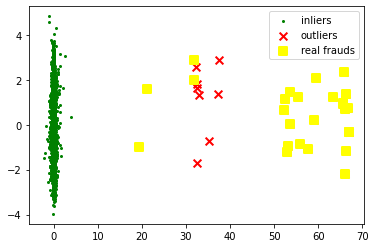

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=2) 
scaler = StandardScaler()
#normalize the metrics
feature_set = val_df.copy()
feature_set['anomaly'] = val_df['Class']
feature_set['realFraud'] = pred

outliers=feature_set.loc[feature_set['anomaly']==1]
outlier_index=list(outliers.index)

frauds=feature_set.loc[feature_set['realFraud']==1]
frauds_index=list(frauds.index)

X = scaler.fit_transform(feature_set)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111)
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.scatter(X_reduce[frauds_index,0],X_reduce[frauds_index,1],
           lw=2, s=60, marker="s", c="yellow", label="real frauds")
# ax.scatter(train_X_reduced[:, 0], train_X_reduced[:, 1], zs=train_X_reduced[:, 2], s=4, lw=1, label="trainset",c="blue")
ax.legend()
plt.show()